# Project Notebook
We will summarize the steps taken and rational of this notebook, and how it is related to out report and the presentation.

## Data Collection
The data used in this project are decided to be: 
1. Kaggle Data Science Survey, 

2. Job Portals(Indeed and Glassdoor)

3.Universities Database(universities websites and Class Central)

The data was collected from all the different sources cited above in order to gain insight on key skills needed to design the course and curriculum along with requirements for part.

- The Kaggle Data science survey data is well organized, and provides usefull information about data science industry including technical skills needed for the job, distribution of pay in different regions, requirements to become a data scientist. 
- For Indeed and Glass door, we scraped the data scientist job postings in Canada and US in order to match the specific hard skills with either business or technical sector used in the industry




In [1]:
#Import the required libraries


import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


import seaborn as sns

In [2]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


In [3]:
def circle_plot(labels,counts,title,figsize=None):
  '''
  label: strings [columns]
  counts: int [counts]
  '''
  if figsize:
    plt.figure(figsize=figsize)
  else:
    plt.figure(figsize=(10,10))
  plt.pie(x=counts,labels=labels,autopct='%1.1f%%')
  centre_circle=plt.Circle((0,0),0.7,color='white',fc='white',linewidth=1)
  fig=plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.title(title)
  plt.axis('equal')
  plt.show()

In [4]:
def bar_plot(labels,counts,title,xlabel=None,ylabel=None,palette=None):
  plt.figure(figsize=(10,8))
  sns.barplot(y=labels,x=counts)
  plt.title(title,fontsize=16)
  if palette:
      sns.barplot(y=labels,x=counts,palette=palette)
  if xlabel:
    plt.xlabel(xlabel,fontsize=16)
  if ylabel:
    plt.ylabel(ylabel,fontsize=16)
  plt.show()

# Kaggle Data:

As mentioned earlier, Kaggle Data set covers a wide variety of topics related to the industry providing really insightful data for our project. Hence we will start with the Kaggle dataset first. 
The process is divided into 3 parts:

1. Data Preparation:
2. Overview of the industry- we will look at the pay scale, gender and ratio of data scientist in the industry.
3. Designing MIE 1624 course:

In [5]:
df = pd.read_csv('CSVs/kaggle_salary.csv')

df =df.drop([0])

df.head()

/Users/sahilnarula/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,3,9,11,13,22,24,25,26,27,28,29,45,57,65,84,86,88,108,110,124,126,151,195,209,224,250,263,265,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,305,307,323,326,327,330,342,372,385,386,394,395) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
1,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
2,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
3,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
4,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0
5,8,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,...,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,4.0


In [6]:
# See how many null values are in each column
df.isnull().sum(axis=0)

Unnamed: 0                                 0
Time from Start to Finish (seconds)        0
Q1                                         0
Q1_OTHER_TEXT                              0
Q2                                         0
Q3                                         0
Q4                                         0
Q5                                       135
Q6                                         0
Q6_OTHER_TEXT                              0
Q7                                         0
Q7_OTHER_TEXT                              0
Q8                                        76
Q9                                         0
Q10                                      292
Q11_Part_1                              7966
Q11_Part_2                             11186
Q11_Part_3                             11278
Q11_Part_4                              9705
Q11_Part_5                             11845
Q11_Part_6                             12914
Q11_Part_7                             14758
Q11_OTHER_

In [7]:
# dropping any rows that have complete null values
df.dropna(axis=0, how='all', subset=None, inplace=True)

In [8]:
df.pop('Unnamed: 0'); # Remove the additional index that cropped up while reading the dataframe
df.pop('index');# Remove the extra index column
df.pop('Time from Start to Finish (seconds)')

1          434
2          718
3          731
4          959
5         1758
6          751
7          823
8         1091
9         1917
10         846
11        1153
12        2626
13        1388
14        2150
15        1361
16        2052
17        1327
18        1177
19        1298
20        1012
21        2063
22        3266
23        1023
24        1419
25        1344
26        1724
27        1996
28         971
29        2432
30        1185
         ...  
15400      394
15401      411
15402      877
15403    32154
15404    42478
15405      474
15406      292
15407      439
15408     9763
15409    12032
15410      625
15411      872
15412      480
15413     2294
15414      180
15415      907
15416    28031
15417      697
15418      940
15419      183
15420     1804
15421     1536
15422      180
15423      699
15424      539
15425     1800
15426      129
15427      348
15428      575
15429      370
Name: Time from Start to Finish (seconds), Length: 15429, dtype: object

In [9]:
df1 = df.drop(df.index[0]) # drop the first row containing the questions

In [10]:
df1.head()

,Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
2,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,-1,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,-1,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
4,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,-1,...,-1,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1
5,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,Other,1,...,-1,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
6,Male,-1,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,-1,Online Service/Internet-based Services,-1,...,-1,NaN,Too time-consuming,NaN,Afraid that others will use my work without gi...,NaN,NaN,NaN,NaN,-1


### In order for us to analyse data correctly for this project, we went through similar exercise of cleaning the data frame with missing values of particular columns/features that were chosen as important for our analysis

#### Q5: Which best describes your undergraduate major?

In [11]:
df1['Q5'].value_counts()

Computer science (software engineering, etc.)                    5937
Engineering (non-computer focused)                               2468
Mathematics or statistics                                        2074
A business discipline (accounting, economics, finance, etc.)     1290
Physics or astronomy                                              843
Information technology, networking, or system administration      642
Medical or life sciences (biology, chemistry, medicine, etc.)     615
Other                                                             499
Social sciences (anthropology, psychology, sociology, etc.)       413
Humanities (history, literature, philosophy, etc.)                210
Environmental science or geology                                  175
I never declared a major                                           68
Fine arts or performing arts                                       59
Name: Q5, dtype: int64

In [12]:
a = df1['Q4'].value_counts(normalize=True)
b = df1[df1['Q5'].isnull()]['Q4'].value_counts(normalize=True)
print (pd.DataFrame({'Alldata': a, 'NaN Undergrad':b}))

                                                     Alldata  NaN Undergrad
Bachelor’s degree                                   0.284029            NaN
Doctoral degree                                     0.163469            NaN
I prefer not to answer                              0.008426            NaN
Master’s degree                                     0.472258            NaN
No formal education past high school                0.008750            1.0
Professional degree                                 0.024890            NaN
Some college/university study without earning a...  0.038177            NaN


It can be seen from the above data that 100% the missing values related to Q5 is related to people who answered "no formal education" in Q4
Hence, we will fill the values with "No Degree"

In [13]:
df1.loc[df['Q5'].isnull(), 'Q5'] = 'No Degree'

#### Q8 - How many years of experience do you have in your position?


It can be seen from the above data that 84% the missing values related to Q8 is related to people who answered student in Q6 Hence, we will fill the values with the mode of values in Q8 that correspond to what other students filled in the question

In [14]:
a = df1['Q6'].value_counts(normalize=True)
b = df1[df1['Q8'].isnull()]['Q6'].value_counts(normalize=True)
print (pd.DataFrame({'Alldata': a, 'NaN Exp':b}))

                          Alldata   NaN Exp
Business Analyst         0.038242  0.052632
Chief Officer            0.016269       NaN
Consultant               0.037140  0.013158
DBA/Database Engineer    0.007584       NaN
Data Analyst             0.092559  0.039474
Data Engineer            0.036557       NaN
Data Journalist          0.000648       NaN
Data Scientist           0.210591  0.013158
Developer Advocate       0.005509       NaN
Manager                  0.029297       NaN
Marketing Analyst        0.005639       NaN
Other                    0.065984  0.013158
Principal Investigator   0.005380       NaN
Product/Project Manager  0.021325       NaN
Research Assistant       0.028973       NaN
Research Scientist       0.059956  0.013158
Salesperson              0.005185       NaN
Software Engineer        0.151672  0.013158
Statistician             0.011667       NaN
Student                  0.169821  0.842105


In [15]:
# We will next find mode for the values in Q8 that correspond to "Student" in Q6 which has the highest missing values and fill the missing values with the mean
Mode_Q8 = df1[df1['Q6']=='Student']['Q8'].mode()
Mode_Q8

0    0-1
dtype: object

In [16]:
df1.loc[df1['Q8'].isnull(), 'Q8'] = '0-1'
df1['Q8'].value_counts()

0-1      3955
1-2      2826
5-10     1972
2-3      1965
3-4      1308
4-5      1145
10-15    1123
15-20     595
20-25     271
30 +      144
25-30     124
Name: Q8, dtype: int64

#### Q17 What specific programming language do you use

In [17]:
df1[df1['Q17'].isnull()].iloc[:,51:70]. head()

,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER_TEXT,Q15_Part_1,Q15_Part_2,Q15_Part_3,Q15_Part_4,Q15_Part_5,Q15_Part_6,Q15_Part_7,Q15_OTHER_TEXT,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6
4,NaN,NaN,NaN,NaN,-1,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,R,NaN,NaN,NaN,NaN
5,NaN,JupyterHub/Binder,NaN,NaN,-1,NaN,NaN,Microsoft Azure,NaN,NaN,NaN,NaN,-1,Python,NaN,NaN,NaN,NaN,NaN
11,NaN,JupyterHub/Binder,NaN,NaN,-1,NaN,Amazon Web Services (AWS),NaN,NaN,NaN,NaN,NaN,-1,Python,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,-1,NaN,NaN,Microsoft Azure,NaN,NaN,NaN,NaN,-1,Python,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,I have not used any cloud providers,NaN,-1,NaN,NaN,SQL,NaN,NaN,NaN


It can be seen that Q16 and Q17 are very similar and Q16 can be used to fill missing values for Q17

    Q16:What programming languages do you use on a regular basis?
    Q17:What specific programming language do you use

It can also be seen from the table above that there is one value in Q16 for a specific missing value in Q17. we will fill the values in Q17 with Q16

In [18]:
df1.shape

(15428, 394)

In [19]:
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_1)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_2)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_3)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_4)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_5)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_6)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_7)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_8)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_9)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_10)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_11)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_12)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_13)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_14)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_15)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_16)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_17)
df1['Q17']=df1['Q17'].fillna(df1.Q16_Part_18)
df1[df1.Q17.isnull()].Q3.value_counts(dropna=False)

United States of America                                358
India                                                   308
China                                                   141
Other                                                    74
Brazil                                                   70
Germany                                                  61
Russia                                                   60
Canada                                                   51
France                                                   48
Japan                                                    44
Spain                                                    43
United Kingdom of Great Britain and Northern Ireland     42
Turkey                                                   40
I do not wish to disclose my location                    31
Australia                                                25
Poland                                                   21
Italy                                   

#### Q20 which ML library have you used the most
Similar analysis can be done for Q20 as done for Q17 since Q19 and Q20 are very similar questions and can be used to fill the values for For Q20

Q20:which ML library have you used the most?

Q19:What machine learning frameworks have you used in the past 5 years?

In [20]:
df1.Q20.value_counts(dropna=False) 

NaN             5768
Scikit-Learn    4506
TensorFlow      1366
Keras           1231
randomForest     463
Xgboost          448
Caret            443
PyTorch          439
Spark MLlib      161
lightgbm         128
H20              115
Fastai           102
Other             85
mlr               47
Caffe             46
Mxnet             26
Prophet           24
catboost          21
CNTK               9
Name: Q20, dtype: int64

In [21]:
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_1)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_2)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_3)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_4)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_5)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_6)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_7)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_8)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_9)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_10)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_11)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_12)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_13)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_14)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_15)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_16)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_17)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_18)
df1['Q20']=df1['Q20'].fillna(df1.Q19_Part_19)
# df['Q20'].dropna(inplace=True)
df1['Q20'].isnull().sum()

1874

#### Q22 which specific data visualization library or tool have you used the most? 
Similar analysis can be done for Q22 as done for Q17 since Q22 and Q21 are very similar questions and can be used to fill the values for For Q22

Q21:What data visualization libraries or tools have you used in the past 5 years? 

Q22:which specific data visualization library or tool have you used the most? 

In [22]:
df1.Q22.value_counts(dropna=False) 

NaN           6242
Matplotlib    4915
ggplot2       2267
Seaborn        982
Plotly         423
D3             200
Shiny          172
Other           87
Bokeh           63
Leaflet         32
Lattice         27
Altair          10
Geoplotlib       8
Name: Q22, dtype: int64

In [23]:
df1['Q22']=df1['Q22'].fillna(df1.Q21_Part_1)
df1['Q22']=df1['Q22'].fillna(df1.Q21_Part_2)
df1['Q22']=df1['Q22'].fillna(df1.Q21_Part_3)
df1['Q22']=df1['Q22'].fillna(df1.Q21_Part_4)
df1['Q22']=df1['Q22'].fillna(df1.Q21_Part_5)
df1['Q22']=df1['Q22'].fillna(df1.Q21_Part_6)
df1['Q22']=df1['Q22'].fillna(df1.Q21_Part_7)
df1['Q22']=df1['Q22'].fillna(df1.Q21_Part_8)
df1['Q22']=df1['Q22'].fillna(df1.Q21_Part_9)
df1['Q22']=df1['Q22'].fillna(df1.Q21_Part_10)
df1['Q22']=df1['Q22'].fillna(df1.Q21_Part_11)
df1['Q22']=df1['Q22'].fillna(df1.Q21_Part_12)
df1['Q22']=df1['Q22'].fillna(df1.Q21_Part_13)

# df['Q20'].dropna(inplace=True)
df1['Q22'].isnull().sum()

1935

In [24]:
#lets check if there is any correlation in missing values between Q20 and Q22
a = df1['Q22'].value_counts(normalize=True,dropna=False)
b = df1[df1['Q17'].isnull()]['Q22'].value_counts(normalize=True,dropna=False)
c = df1[df1['Q20'].isnull()]['Q22'].value_counts(normalize=True,dropna=False)
print (pd.DataFrame({'Q22': a, 'Q17':b, 'Q20':c}))

                 Q22  Q17  Q20
Matplotlib  0.442637  NaN  NaN
ggplot2     0.185766  NaN  NaN
NaN         0.125421  1.0  1.0
None        0.082642  NaN  NaN
Seaborn     0.068123  NaN  NaN
Plotly      0.031760  NaN  NaN
D3          0.020288  NaN  NaN
Other       0.016204  NaN  NaN
Shiny       0.013417  NaN  NaN
Bokeh       0.004861  NaN  NaN
Leaflet     0.003630  NaN  NaN
Lattice     0.002593  NaN  NaN
Geoplotlib  0.001556  NaN  NaN
Altair      0.001102  NaN  NaN


/Users/sahilnarula/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


In [25]:
#It can be seen that all missing values are common rows and are left by the same candidates, we will drop these columns for the sake of our analysis:
df1.drop(df1[df1.Q22.isnull()].index,inplace= True)
df1['Q22'].isnull().sum()
df1['Q20'].isnull().sum()
df1['Q17'].isnull().sum()

0

In [26]:
df1.shape

(13493, 394)

In [27]:
df1['Q9'] = df1['Q9'].astype(int)


## High Level Overview of the industry

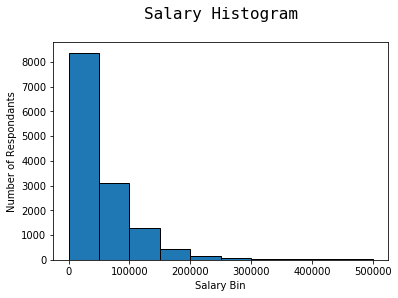

In [28]:

font = {'family': 'monospace',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

plt.hist(df1['Q9'], bins=10,edgecolor='black')
plt.title("Salary Histogram\n", fontdict = font)
plt.xlabel("Salary Bin")
plt.ylabel("Number of Respondants")
plt.show()

the first data exploration graph presented is the binned salary distribution of the data set. The salary data was binned into 10 bins and as can be seen from the histogram above the majority of the respondants have answered that their annual incomes are between \$ 0 - \$ 50,000 . While majority of the respondants fall in the income range of \$ 0 - \$ 200,000 . The highest reported income is \$ 500,000. 

This also suggests that the respondants are people who are not living in US or North America and therefore their earnings are lower

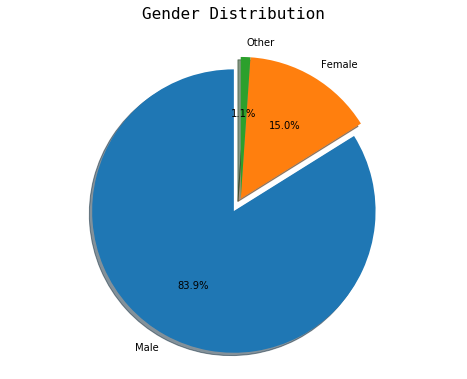

In [29]:
font = {'family': 'monospace',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

gend = df1['Q1']
gend=gend.map({'Prefer not to say': 'Other', 'Prefer to self-describe': 'Other', 'Male':'Male', 'Female': 'Female'})
a = gend.value_counts()

labels = (np.array(a.index))
sizes = (np.array((a / a.sum())*100))
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8, 6)
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Gender Distribution\n", fontdict = font)
plt.show()

The pie chart below shows the gender distribution of the respondents of the survey. The respondents who chose the options "Prefer not to say" and "Prefer not to self-describe" were combined in the category for "Other" which accounted for approximately 1% of the respondants.

The overwhelming majority of the those taking the survery were Male with 83.4% while Female respondents were 15.5% of the total. Going by the results of the survey it can be said that women participation in the field of data science is severely lagging behind men and more effort needs to be made on the part of the government, policy-makers and employers to attract more women in this field.

### Next have a look at percentage of respondant who are actually data scientists.

In [30]:
ds_count = df1['Q26'].value_counts()

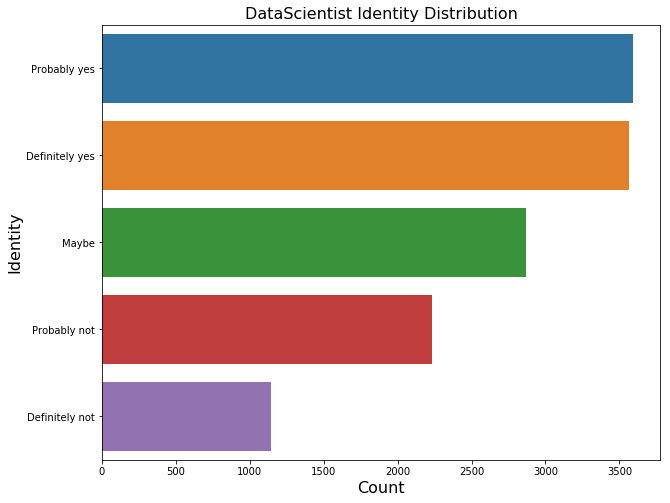

In [31]:
bar_plot(ds_count.index,ds_count.values,'DataScientist Identity Distribution','Count','Identity')

**It seems only arount 1/3 of the respondant are actually working as formal data scientists. It's necessary to filter out the non data-scientists. Now that we have a good idea about the industry, let move on to more specific skills that would be needed for our course**

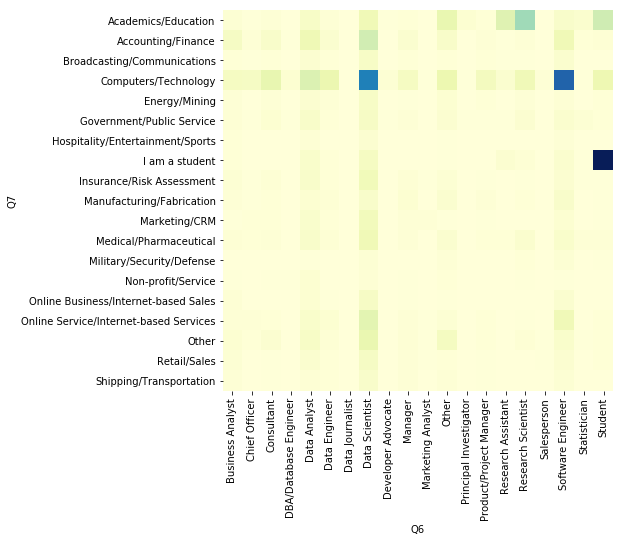

In [32]:
ML_Maj = pd.crosstab(index=df1['Q7'],
                            columns=[df1['Q6']])


plt.figure(figsize=(7, 7))
sns.heatmap(ML_Maj,
            cmap="YlGnBu", cbar=False)

## Looking at key features for Designing MIE1624 course

Since we are designing MIE 1624, we are interested in jobs that are related to Data Scientists, Data Analysts, Data Engineers as it is part of a technical degree.
Furthermore, primary focus of the course would be to get an idea about the data science industry and student would be looking for jobs within NA.
Hence, 2 filters were applied for our analysis:

1. Job Title = Data Scientists, Data Engineers, Data Analysts
2. Country - USA, Canada

**Deciding on key components to design the course**


We then explored the real world data science survey to answer the following questions to help us decide components for our course:
- What are the programs taken by data scientists in their bachelor?
- How much percentage of them are coders?
- What are the current job titles of the data scientists?
- What is language is widely used in the industry
- which ML library is widely used?
- Which Data Visualization is widely used?



### Applying filters as mentioned

In [33]:
df_DS = df[df['Q6'] == "Data Scientist"]
df_DA = df[df['Q6'] == "Data Analyst"]
df_DE = df[df['Q6'] == "Data Engineer"]

In [34]:
df_P1 =df_DS.append([df_DA],[df_DE])
df_P1 = df_P1[df_P1['Q3'] == "United States of America"]
df_CA = df_P1[df_P1['Q2'] == "Canada"]
df_P1 =df_P1.append(df_CA)
df_P1 = df_P1.reset_index(drop = True)

### Background of real-world data scientists:
We will start by looking at the educational background of current professionals in the industry in order to highlight main components for our course outline like,

1. what pre requisite is needed to enroll in the course
2. how much coding needs to be incorporated
3. what undergraduate background is preferred

#### Degree Breakdown:

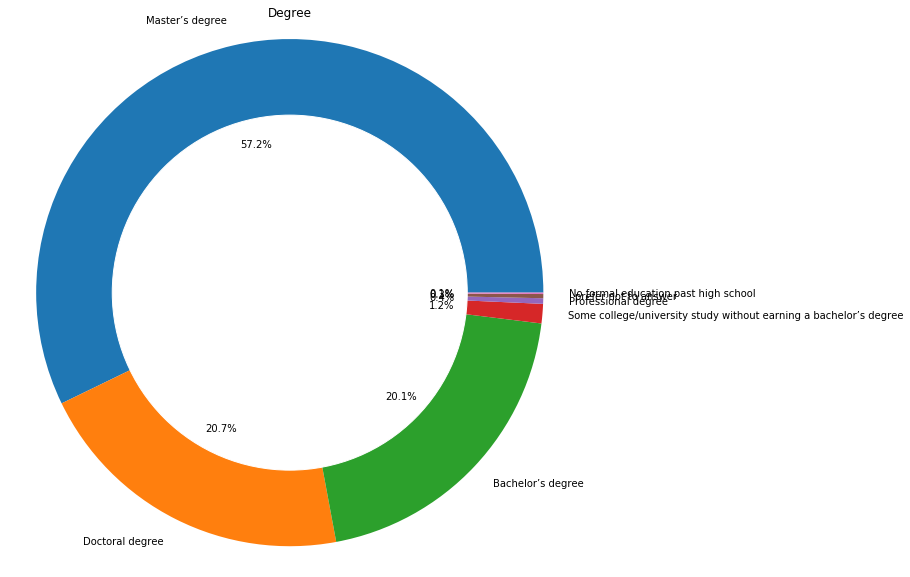

In [35]:
ds_count = df_P1['Q4'].value_counts()
major_labels = ds_count.index
major_counts =ds_count
circle_plot(major_labels,major_counts,title='Degree')

The plot above shows the distribution of the education of the respondants whoa re data scientist.

57% hold a Master's degree. People with Dcotoral degree are the next highest numbers. 

This suggests that the data science field requires concentrated post-secondary education in the field to have a successful, fulfilling career adding with our course being a stepping stone

#### with Masters and PHD being most common degrees in the industry, lets look at the undergrad major for these professionals as it will help us in deciding what technical background is needed for the course:

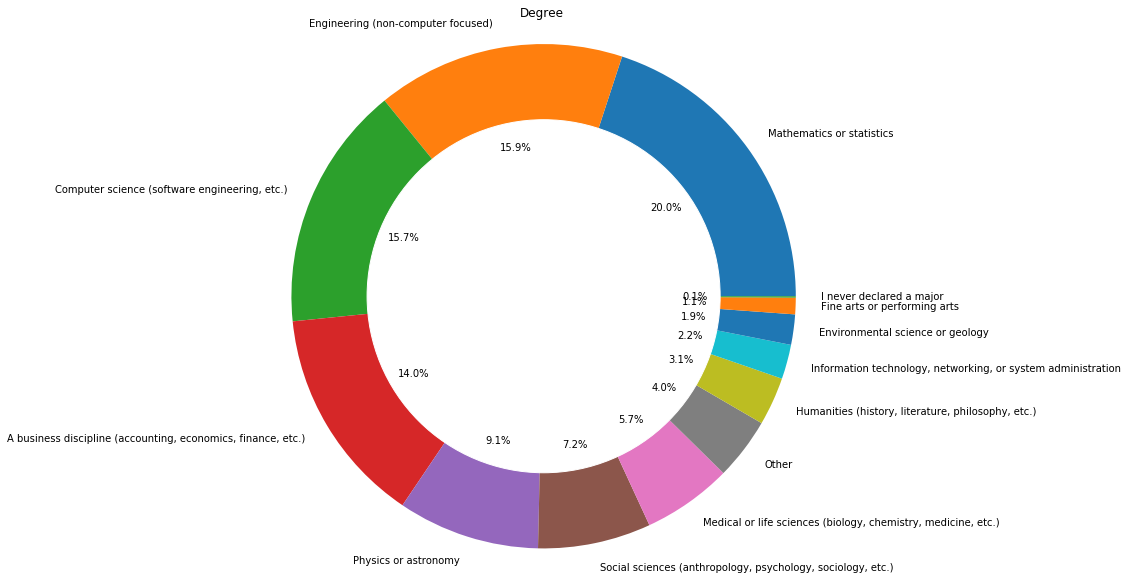

In [36]:
ds_count = df_P1['Q5'].value_counts()
major_labels = ds_count.index
major_counts =ds_count
circle_plot(major_labels,major_counts,title='Degree')

### Insights:

Majority of the data scientist have degree of CS, Engineering, Math, Physics.

Those degrees all requires in depth understanding of mathmatics.

Those degrees all requires hands-on ability.

CS major is the most common degree, which means the importance of programming skill.

## How much Coding needs to be part of our course?

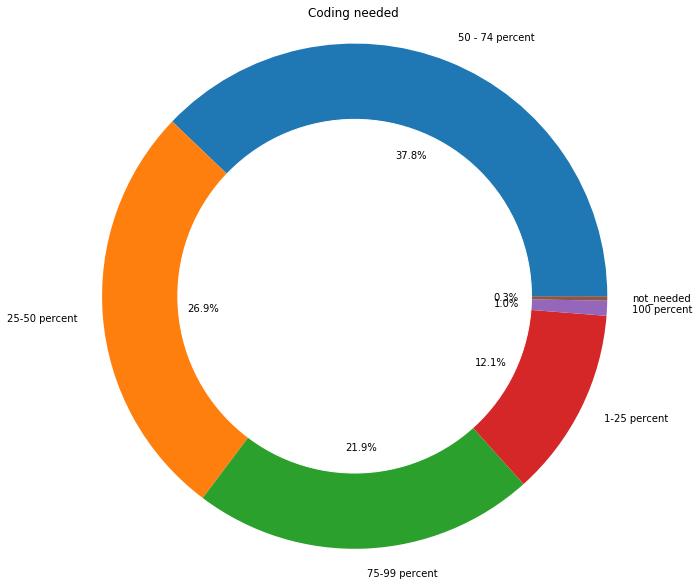

In [37]:
df_23 = pd.DataFrame(df_P1['Q23'].value_counts())

df_23.rename(index={'0% of my time':'not_needed','25% to 49% of my time':'25-50 percent','75% to 99% of my time':'75-99 percent','1% to 25% of my time':'1-25 percent','100% of my time': '100 percent','50% to 74% of my time':'50 - 74 percent'},inplace = True)


circle_plot(df_23.index,df_23,title='Coding needed')



### Insights
Non surprisingly, majority of the data scientists are writing code, meaning coding is necessary for data science course design

#### Lets dig deep by looking at the top Programming skills being used:

In [38]:
df2=pd.DataFrame(index = df_P1['Q17'].unique())
df2['skill used'] = df_P1['Q17'].value_counts(normalize= True)*100
df2=df2.dropna()
df2

,skill used
Java,0.860215
Python,50.752688
R,23.333333
Other,0.107527
SQL,19.354839
Scala,0.645161
C#/.NET,0.430108
SAS/STATA,2.795699
Javascript/Typescript,0.107527
MATLAB,0.752688


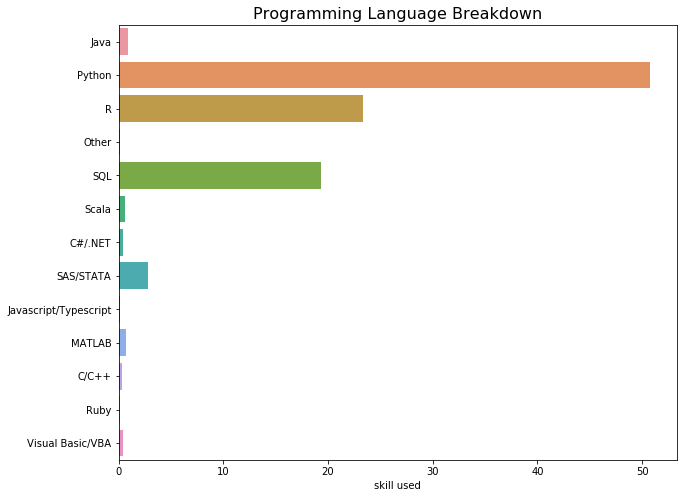

In [39]:
bar_plot(df2.index,df2['skill used'],"Programming Language Breakdown",xlabel=None,ylabel=None,palette=None)

#### Insights:

its showing that 95% of the software used in the industry are mainly:
1. Python - 86%
2. R - 9.5%
3. SQL - 2.3%

This goes to show how widely use python is in job market. It makes senses to include Python as a programming language to learn machine learning

#### Which ML Library is most commonly used?

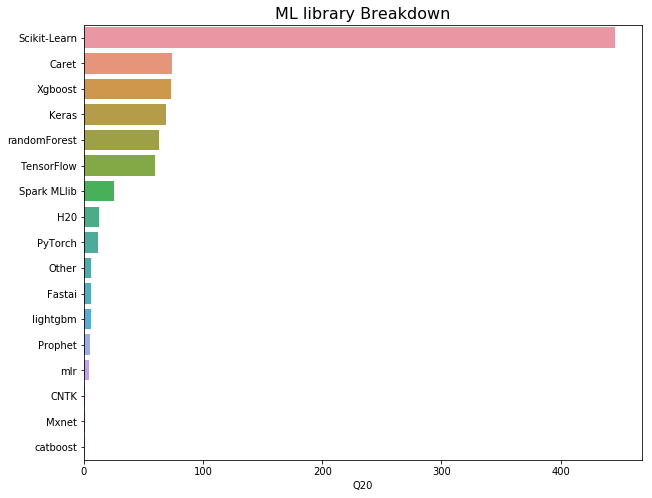

In [40]:
ds_count = df_P1['Q20'].value_counts()
bar_plot(ds_count.index,df_P1['Q20'].value_counts(),"ML library Breakdown",xlabel=None,ylabel=None,palette=None)

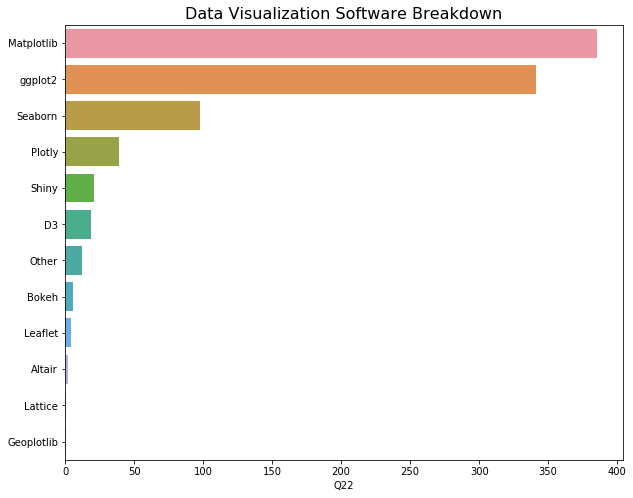

In [41]:
ds_count = df_P1['Q22'].value_counts()
bar_plot(ds_count.index,df_P1['Q22'].value_counts(),"Data Visualization Software Breakdown",xlabel=None,ylabel=None,palette=None)

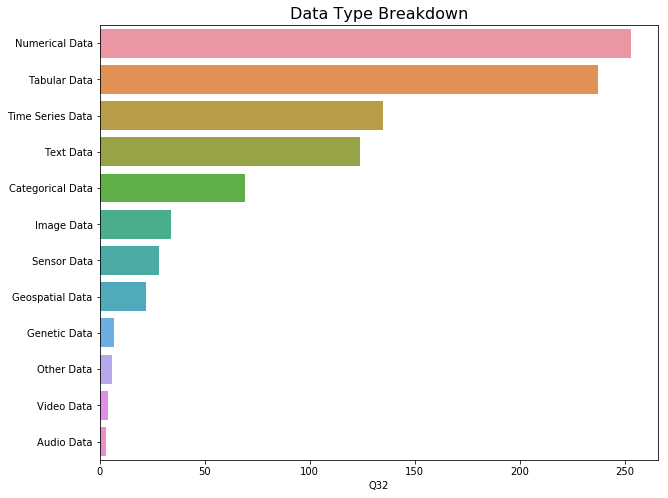

In [42]:
ds_count = df_P1['Q32'].value_counts()
bar_plot(ds_count.index,df_P1['Q32'].value_counts(),"Data Type Breakdown",xlabel=None,ylabel=None,palette=None)

### Insights:

The following plots tell us about specific ML library and data visulatization software needs to be incorporated in the course.

The  data will allow us to design course assignments that would teach students the practical use of top most used ML libraries and Data visualization software

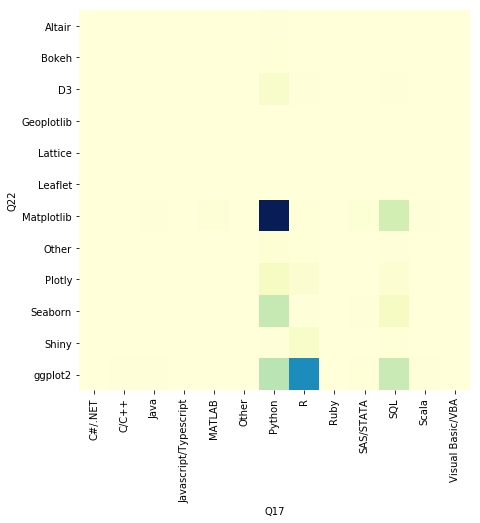

In [43]:
ML_Maj = pd.crosstab(index=df_P1['Q22'],
                            columns=[df_P1['Q17']])


plt.figure(figsize=(7, 7))
sns.heatmap(ML_Maj,
            cmap="YlGnBu", cbar=False)

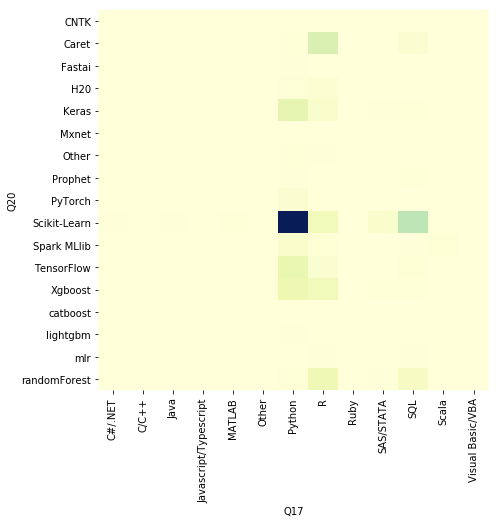

In [44]:
ML_Maj = pd.crosstab(index=df_P1['Q20'],
                            columns=[df_P1['Q17']])


plt.figure(figsize=(7, 7))
sns.heatmap(ML_Maj,
            cmap="YlGnBu", cbar=False)

#### Above graphs helped us to decide the key programming skills needed for our course:

1. **Programming Language: Python**
2. **ML Library to include: SciKit Learn**
3. **Visulaization Library: Matlplotlib**

### Lets Validate these trends by highlighting feature importance through Extra Trees Classifier:
Lets use these features in extra tress classifier and identify which skill is more important for a higher paying job

In [45]:
df_clean = pd.DataFrame()
df_P1['Q9']=df_P1['Q9'].astype(int)
df_clean['Salary'] = df_P1['Q9']
df_clean['Sex'] = df_P1['Q1']
df_clean['Age'] = df_P1['Q2']
df_clean['Country'] = df_P1['Q3']
df_clean['Degree'] = df_P1['Q4']
df_clean['Major'] = df_P1['Q5']
df_clean['Title'] = df_P1['Q6']
df_clean['job_exp'] = df_P1['Q8']
df_clean['programming language'] = df_P1['Q17']
df_clean['Ml_library'] = df_P1['Q20']
df_clean['Visualization'] = df_P1['Q22']
df_clean['Online_Platform'] = df_P1['Q37']
df_clean.head()

,Salary,Sex,Age,Country,Degree,Major,Title,job_exp,programming language,Ml_library,Visualization,Online_Platform
0,2726,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,0-1,Java,NaN,ggplot2,DataCamp
1,132826,Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,5-10,Java,Scikit-Learn,NaN,Udacity
2,140203,Male,30-34,United States of America,Doctoral degree,"Social sciences (anthropology, psychology, soc...",Data Scientist,3-4,Python,NaN,ggplot2,Coursera
3,138799,Female,35-39,United States of America,Doctoral degree,"Social sciences (anthropology, psychology, soc...",Data Scientist,10-15,R,Keras,ggplot2,NaN
4,128918,Male,35-39,United States of America,Master’s degree,"Humanities (history, literature, philosophy, e...",Data Scientist,1-2,Python,Scikit-Learn,Matplotlib,Coursera


In [46]:
y = df_clean.pop('Salary') # separate target value
X =df_clean
X= pd.get_dummies(data=df_clean)
X.head(2)


,Sex_Female,Sex_Male,Sex_Prefer not to say,Sex_Prefer to self-describe,Age_18-21,Age_22-24,Age_25-29,Age_30-34,Age_35-39,Age_40-44,...,Online_Platform_DataCamp,Online_Platform_DataQuest,Online_Platform_Fast.AI,Online_Platform_Kaggle Learn,Online_Platform_Online University Courses,Online_Platform_Other,Online_Platform_Udacity,Online_Platform_Udemy,Online_Platform_developers.google.com,Online_Platform_edX
0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Feature Importance
We can validate the results of our analysis by getting the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives the score for each feature selected, the higher the score more important or relevant is the feature towards your output variable(Salary in this case).

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

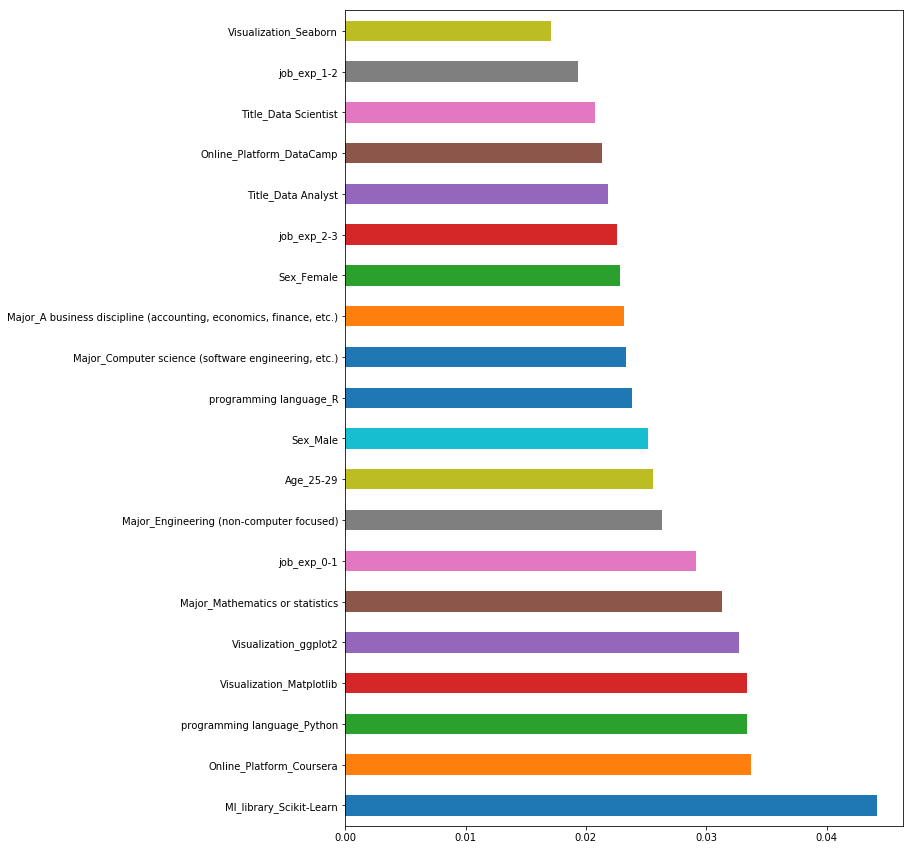

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(10, 15))
plt.show()

### Looking at the exploratory analysis we can got the following insights:

Data scientists can be divided into 3 differet types, namely: **Data Analysts, Data Engineer and Data Scientist **(*Here "Scientist" means they are doing more research*)
- The majority of data scientists are coders, and most of them studied mathematics, engineers and computer science. 

Based on the findings above, we performed skills analysis on each of the 3 type streams. We analyzed the popular tools, ML skills and techniques among Data Scientist(researcher), data engineer and data analyst, as well as business analyst. We also researched on the skills and tools that would become popular in the future, which will also give guidance of our program design.


Industry wide technical tools used in this field are:
1. Python
2. Scikit Learn
3. MAtplotlib
  


# Modelling

Using the Kaggle Data Survey data and Indeed and glassdoor data, we performed an unsupervised clustering using Hierarchical algorithm.

The main features we used includes: 
Amount of coding done, programming language, Undergrad Major, ML library and Visualization libraries used as specified the top features in Classifier. The clustering algorithm uses distance as a metric.

Cosine similarity was calculated between the features which acts as a distance matrix. We used this matrix as an input into clustering algorithm.

Hierarchical clustering was chosen as it does not require defined number of clusters and have the option of either inputting data and selecting distance, or input a distance matrix directly(as in our case)

However, Hierarchical clustering does not bode well large amounts of data with variables. Hence, we will manipulate the data for easy representation of the dendrogram. The heirarchical will give us further insights by categorizing similar and important features together in a cluster based on their frequency



In [48]:
df_clean.drop(df_clean[df_clean['Ml_library'] == "None"].index,inplace= True)
df_clean.drop(df_clean[df_clean['Visualization'] == "None"].index,inplace= True)
df_clean.drop(df_clean[df_clean['Online_Platform'] == "None"].index,inplace= True)

df_clean.head()

,Sex,Age,Country,Degree,Major,Title,job_exp,programming language,Ml_library,Visualization,Online_Platform
0,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,0-1,Java,NaN,ggplot2,DataCamp
1,Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,5-10,Java,Scikit-Learn,NaN,Udacity
2,Male,30-34,United States of America,Doctoral degree,"Social sciences (anthropology, psychology, soc...",Data Scientist,3-4,Python,NaN,ggplot2,Coursera
3,Female,35-39,United States of America,Doctoral degree,"Social sciences (anthropology, psychology, soc...",Data Scientist,10-15,R,Keras,ggplot2,NaN
4,Male,35-39,United States of America,Master’s degree,"Humanities (history, literature, philosophy, e...",Data Scientist,1-2,Python,Scikit-Learn,Matplotlib,Coursera


## Comparing programming language and Major needed most used in the jobs:


Cross tab was used in order to group programming language against educational background in undergrad to check which similar languages group together. This would help us in deciding courses for our curriculum for our Part 2 and Part 3 of the project:

In [49]:
lang = pd.crosstab(index=df_clean['programming language'],
                            columns=[df_clean['Major']])

lang.head(2)


Major,"A business discipline (accounting, economics, finance, etc.)","Computer science (software engineering, etc.)",Engineering (non-computer focused),Environmental science or geology,Fine arts or performing arts,"Humanities (history, literature, philosophy, etc.)","Information technology, networking, or system administration",Mathematics or statistics,"Medical or life sciences (biology, chemistry, medicine, etc.)",Other,Physics or astronomy,"Social sciences (anthropology, psychology, sociology, etc.)"
programming language,,,,,,,,,,,,
C#/.NET,0,2,1,0,0,0,0,1,0,0,0,0
C/C++,0,2,0,0,0,0,1,0,0,0,0,0


Calculating Cosing Similarity matrix and deriving distance matrix from it. Cosine similarity is a metric used to determine how similar the documents are irrespective of their size.

In [50]:
dist = 1 - cosine_similarity(lang)

In [51]:
dist.shape

(13, 13)

In [52]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering( affinity='euclidean', linkage='ward')  
cluster.fit_predict(dist)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [53]:
print(cluster.labels_)  

[0 0 0 1 0 1 0 0 0 0 0 0 0]


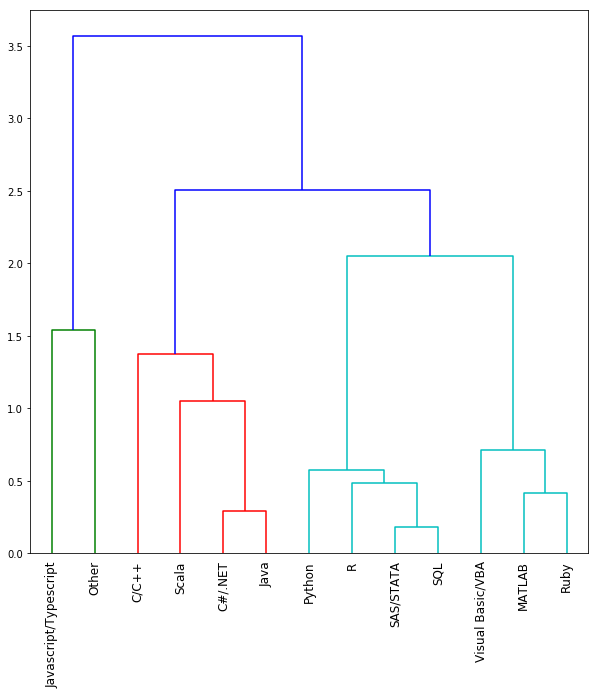

In [54]:
label = []
label = lang.index.tolist()
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 10))
dendrogram = sch.dendrogram(sch.linkage(dist,method = 'ward'), labels = label, leaf_rotation = 90, show_contracted = True, p =14, truncate_mode = "lastp")
# dendrogram.ax.set_xticklabels(labels = label, rotation =90)



___By analyzing the clusters, we found that 
Python, R, SAS and SQL occur in similar frequency. this would show that the application of these 3 languages is similar to each other. As seen above in the exploratory analysis, this group of languages is most commonly used by data scientist int he industry.
In choosing multiple languages to teach over the curriculum, the cluster can be used to decide which set of languages to teach_____

## Comparing Age with Programming languages:

In [55]:
#Making cluster for the skill

Age = df_clean[['Age', 'programming language']]
Age= pd.get_dummies(data=Age)
Age = Age.reset_index(drop = True)

Age=Age.transpose(copy=True)
Age.dropna(axis=0, how='all', subset=None, inplace=True)

# Age.rename(index=lambda x: x[11], inplace=True)
Age.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132
Age_18-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Age_22-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
dist = 1 - cosine_similarity(Age)

In [57]:
dist.shape

(25, 25)

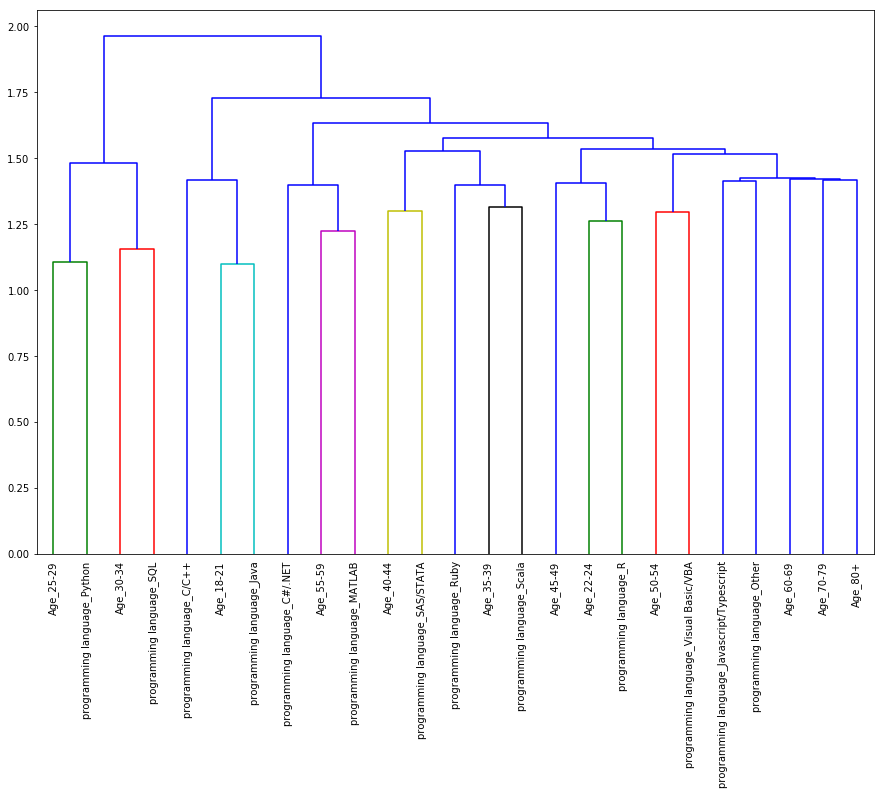

In [58]:
label = []
label = Age.index.tolist()
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(dist,method = 'ward'), labels = label,distance_sort = 'ascending', leaf_rotation = 90, show_contracted = True)


____By analyzing the clusters the younger data scientists prefer to use Python, R and and C/C++. Mid level scientist are more proficient in SQL. The finding indicates that the Python and R are more intensively used in the nowadays data science industry, and it's suggested that the future data science students should give preference to Python as the main programming language.____

## For desiging multiple course: Comparing Programming languages, ML Libraries and Visualization and Data type

***Due to the high number of features and difficulty in representing them, we will take the insights from our exploratory analysis and take top 3 most used features from each category***

In [59]:
#Making a data frame for all the skills.

skills = df_P1[['Q16_Part_1',
                'Q16_Part_2','Q16_Part_3','Q16_Part_16','Q19_Part_1','Q19_Part_13', 'Q19_Part_9',
                'Q19_Part_10','Q21_Part_1','Q21_Part_8','Q21_Part_2','Q21_Part_6','Q31_Part_10','Q31_Part_6','Q31_Part_8']]
skills= pd.get_dummies(data=skills)
skills = skills.reset_index(drop = True)

skills=skills.transpose(copy=True)
skills.dropna(axis=0, how='all', subset=None, inplace=True)

skills.rename(index=lambda x: x[11:], inplace=True)
skills

,0,1,2,3,4,5,6,7,8,9,...,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132
Python,0,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,1
R,1,0,1,1,0,0,1,1,1,1,...,0,1,0,0,1,1,1,0,1,1
SQL,0,1,1,1,1,0,1,1,1,1,...,1,1,1,0,1,1,1,0,1,1
_SAS/STATA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Scikit-Learn,0,1,0,1,1,1,1,1,1,1,...,0,0,0,0,1,1,0,0,1,1
_randomForest,0,1,0,1,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,1
Caret,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,1,0,1,0,0,1
_Xgboost,0,1,0,1,0,1,1,1,1,1,...,0,1,0,0,1,1,0,0,0,0
ggplot2,1,0,1,1,1,0,0,1,0,1,...,0,0,1,0,1,1,1,0,1,1
Seaborn,1,0,1,0,1,1,0,1,1,1,...,0,0,1,0,0,1,0,0,1,1


In [60]:
dist = 1 - cosine_similarity(skills)

In [61]:
dist.shape

(15, 15)

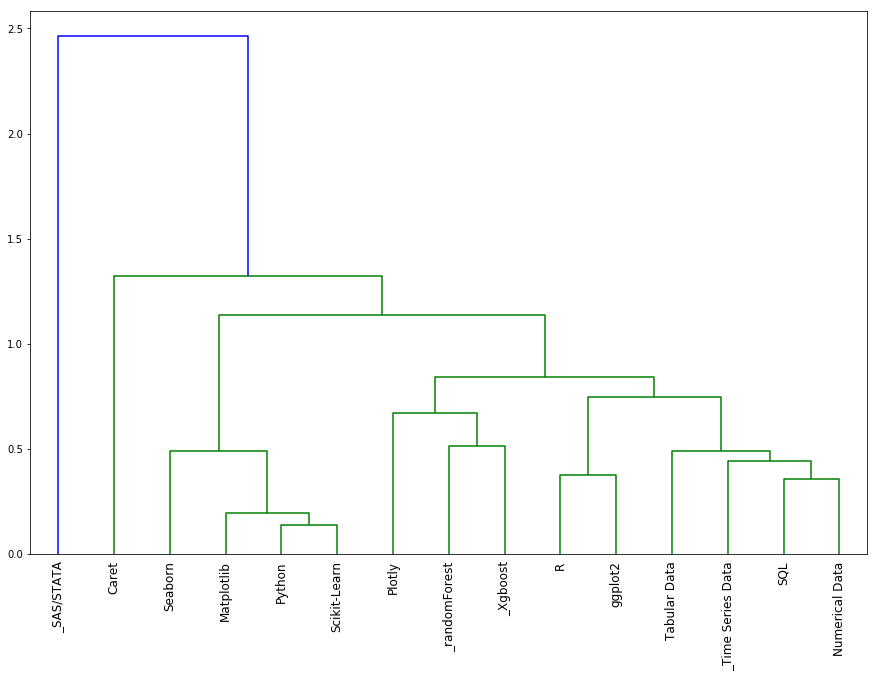

In [62]:
label = []
label = skills.index.tolist()
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(dist,method = 'ward'), labels = label,distance_sort = '', leaf_rotation = 90, show_contracted = True)


____analyzing each cluster gives useful insight on key skills that are used together____ 

1. People who use Python, also suse Scikit learn and Matplotlib. This cluster is then closer to another visualization library, Seaborn that is commonly used in Python.( What MIE 1624 currently incorporates!)

2. Visualization software ggplot2 is used with R and ML librarys Xgboost and random forest are used both in Python and R(more so in R)

3. Numerical Data is closely linked with SQL, which makes sense as  SQL is standard language for database management system

## Analyzing Coding required with Undergrad major

In [63]:
df_P1.Q23 = df_P1.Q23.astype('str')
coding = df_P1['Q23']
coding= pd.get_dummies(data=coding)
coding=coding.transpose(copy=True)
coding.rename(index=lambda x: x[:11], inplace=True)
coding.dropna(axis=0, how='all', subset=None, inplace=True)
coding

,0,1,2,3,4,5,6,7,8,9,...,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132
0% of my ti,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1% to 25% o,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
100% of my,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25% to 49%,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
50% to 74%,0,0,1,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
75% to 99%,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
nan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [64]:
major = df_P1['Q5']
major= pd.get_dummies(data=major)
major=major.transpose(copy=True)

major

,0,1,2,3,4,5,6,7,8,9,...,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132
"A business discipline (accounting, economics, finance, etc.)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
"Computer science (software engineering, etc.)",1,0,0,0,0,0,0,1,0,0,...,0,1,1,1,0,0,0,0,0,0
Engineering (non-computer focused),0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Environmental science or geology,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fine arts or performing arts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Humanities (history, literature, philosophy, etc.)",0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I never declared a major,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Information technology, networking, or system administration",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mathematics or statistics,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
"Medical or life sciences (biology, chemistry, medicine, etc.)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
result = major.append([coding])
result=result.drop('nan')

In [66]:
dist = 1 - cosine_similarity(result)

In [67]:
dist.shape

(19, 19)

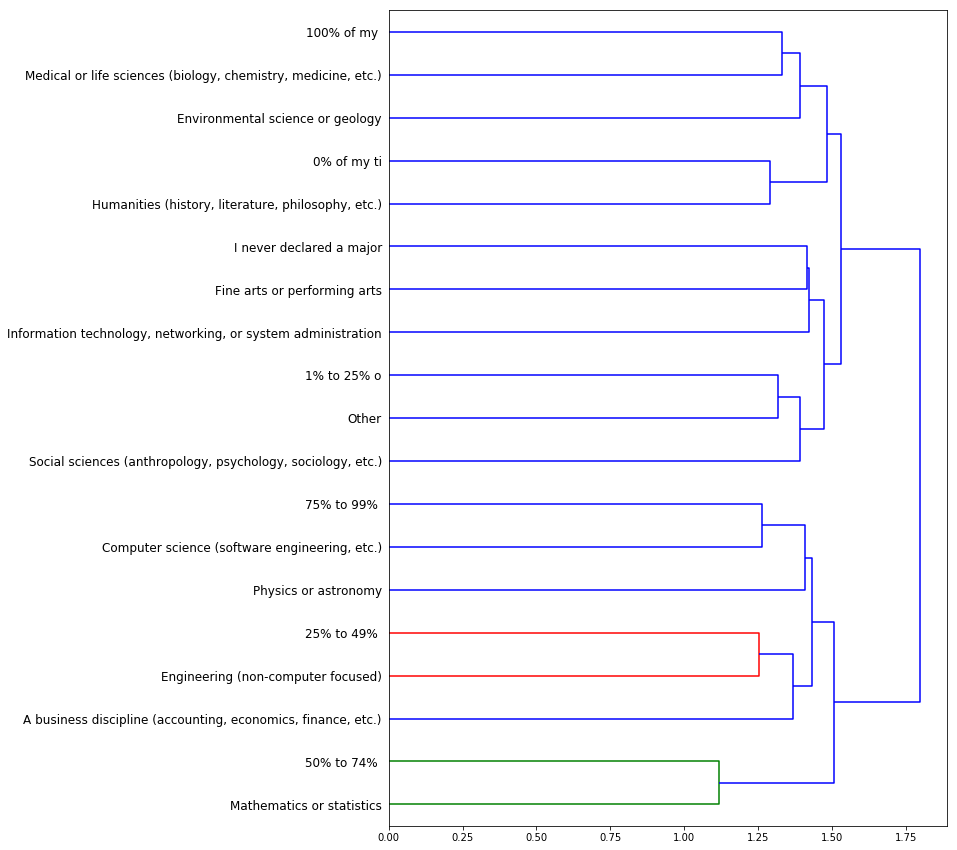

In [68]:
label = []
label = result.index.tolist()
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 15))
dendrogram = sch.dendrogram(sch.linkage(dist,method = 'ward'), labels = label, orientation='right',truncate_mode='mtica')

The graph above clusters scientists and analyst who spend time coding: 
    
the information is useful for designing a curriculum as it provides insight as to the amount coding requried for each stream.

the graph validates that students technical degrees spend more time coding in their career

***For PART 2 students with major where more than 25% of the time is spent coding would be more suitable as they wish to further pursue a techncial degree, such as:***
    
MAthematics , Computer Science, Engineering, Medical or life sciences

***For PART 3 students with major where less than 25% of the time is spent coding would be more suitable as they wish to further pursue a non techncial degree in data science and management, such as:***
Fine arts, Humanities, Social Science, IT etc

# Indeed Glassdoor data for Data Scientist

matching business skill with the programming language

In [69]:
indeed = pd.read_csv('CSVs/indeed_glassdoor_DS.csv')
indeed.pop('Unnamed: 0')
indeed.head()

,business_skills,company_name,database,degree,disc,job_description,language,location,position,rating,skills,tools
0,"process, strategy","Monster Worldwide, Inc.",access,bachelor,NaN,data engineer monster worldwide is seeking a t...,java,"Weston, MA",Data Engineer,3.1,ai,cloud
1,"process, strategy","Monster Worldwide, Inc.",access,bachelor,NaN,data engineer monster worldwide is seeking a t...,scala,"Weston, MA",Data Engineer,3.1,ai,cloud
2,"process, strategy","Monster Worldwide, Inc.",access,bachelor,NaN,data engineer monster worldwide is seeking a t...,go,"Weston, MA",Data Engineer,3.1,ai,cloud
3,"process, optimization",Conduent,NaN,"ms, phd","engineering, computer science, statistics, bus...",conduent is the world's largest provider of di...,python,"Morrisville, NC",Data Scientist: Data Analytics / Machine Learning,2.5,analyze data,NaN
4,"process, optimization",Conduent,NaN,"ms, phd","engineering, computer science, statistics, bus...",conduent is the world's largest provider of di...,scala,"Morrisville, NC",Data Scientist: Data Analytics / Machine Learning,2.5,analyze data,NaN


In [70]:
data = pd.crosstab(index=[indeed['language']],
                            columns=[indeed['skills']])

data=data.transpose(copy=True)
data.dropna(axis=0, how='all', subset=None, inplace=True)
data.head()

language,c,r,.net,azure,bash,c#,c++,clojure,go,hive,...,excel,go,java,python,rstudio,salesforce,sas,scala,spss,sql
skills,,,,,,,,,,,,,,,,,,,,,
ai,5,123,5,30,12,17,74,1,717,95,...,464,581,3,262,0,8,1,102,6,15
apply machine learning,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
artificial,3,12,0,6,1,2,12,0,78,18,...,33,99,0,36,0,3,0,3,1,0
bayesian,0,10,1,4,1,1,11,0,33,7,...,12,3,1,22,0,0,0,0,0,0
clean,3,32,2,13,4,3,11,0,128,30,...,69,136,0,54,0,2,0,14,0,1


In [71]:
dist = 1 - cosine_similarity(data)

In [72]:
dist.shape

(53, 53)

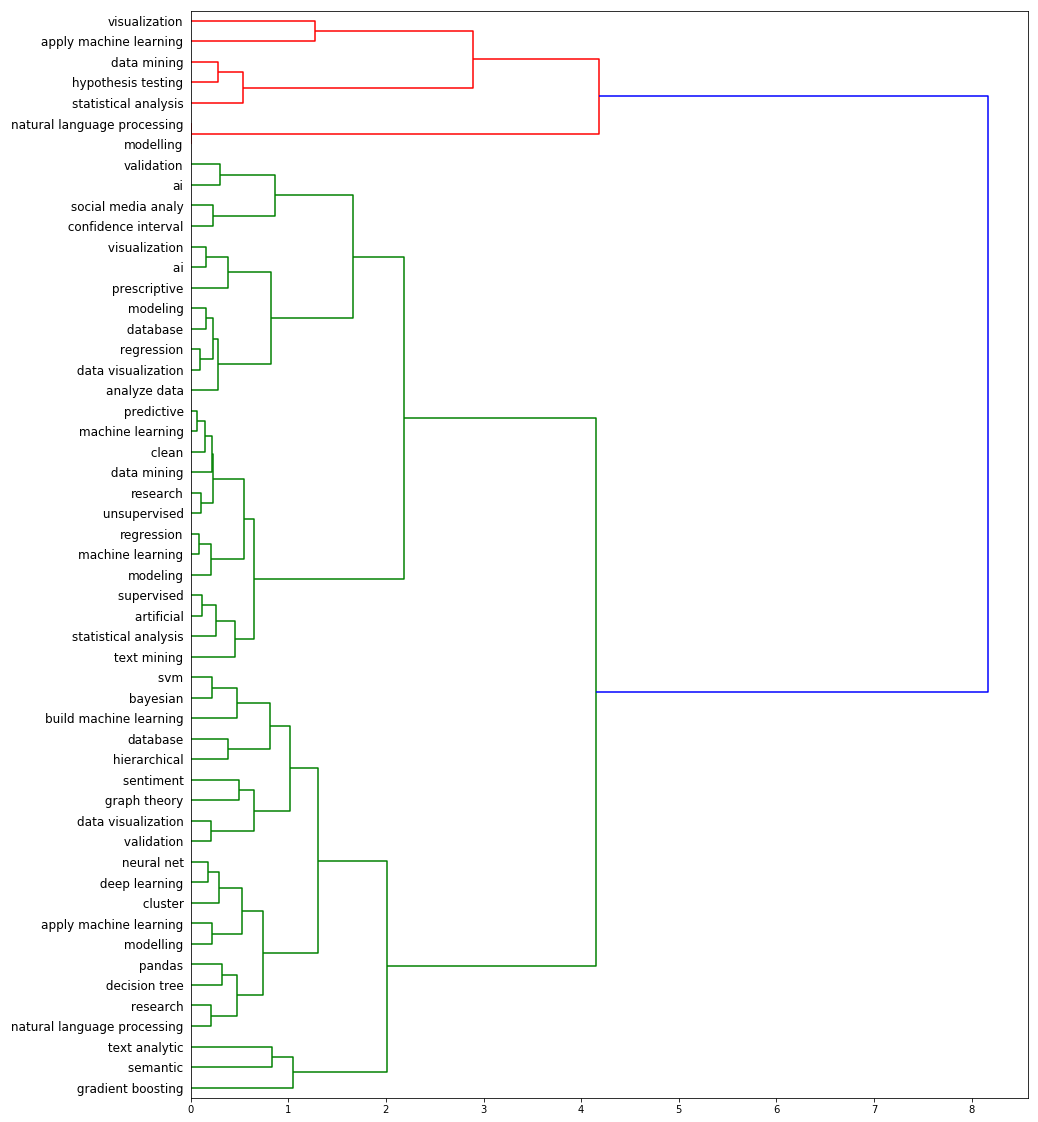

In [73]:

from scipy.cluster import hierarchy
label = []
label = data.index.tolist()
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 20))
dendrogram = sch.dendrogram(sch.linkage(dist,method = 'ward'), labels = label,orientation='right',p=15, truncate_mode='level', get_leaves=True, leaf_font_size=12)

In [74]:
data = pd.crosstab(index=[indeed['business_skills']],
                            columns=[indeed['skills']])

data.dropna(axis=0, how='all', subset=None, inplace=True)
data

skills,ai,artificial,bayesian,clean,cluster,confidence interval,data mining,data visualization,database,decision tree,...,data visualization,database,machine learning,modeling,natural language processing,regression,research,statistical analysis,validation,visualization
business_skills,,,,,,,,,,,,,,,,,,,,,
business intelligence,11,0,0,0,0,0,0,0,6,0,...,0,0,6,2,0,0,2,0,1,0
"business intelligence, efficiency, optimization, marketing, marketing analytics",2,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
"business intelligence, operations, operations",4,0,0,0,0,0,0,0,4,0,...,4,0,0,0,0,0,0,0,0,0
"business intelligence, operations, operations, efficiency",3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
"business intelligence, operations, operations, profit, optimization, strategy, marketing",5,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
"business intelligence, operations, operations, sales, profitability, profit",5,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,5,0,0,0,0
"business intelligence, operations, operations, strategy, marketing",2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
"business intelligence, operations, process, operations",24,0,0,0,24,0,24,0,24,24,...,0,0,0,0,0,0,24,0,0,0
"business intelligence, operations, process, operations, investment, optimization",2,0,0,2,0,0,2,0,2,0,...,0,0,0,0,0,0,2,0,0,0


In [75]:
series_df = indeed[['skills', 'language']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)

In [76]:
series_df = pd.Series(series_df).str.get_dummies(sep=", ")

In [77]:
series_df=series_df.transpose(copy=True)

In [78]:
series_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30361,30362,30363,30364,30365,30366,30367,30368,30369,30370
c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
r,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.net,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
apply machine learning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
dist = 1 - cosine_similarity(series_df)

In [80]:
dist.shape

(93, 93)

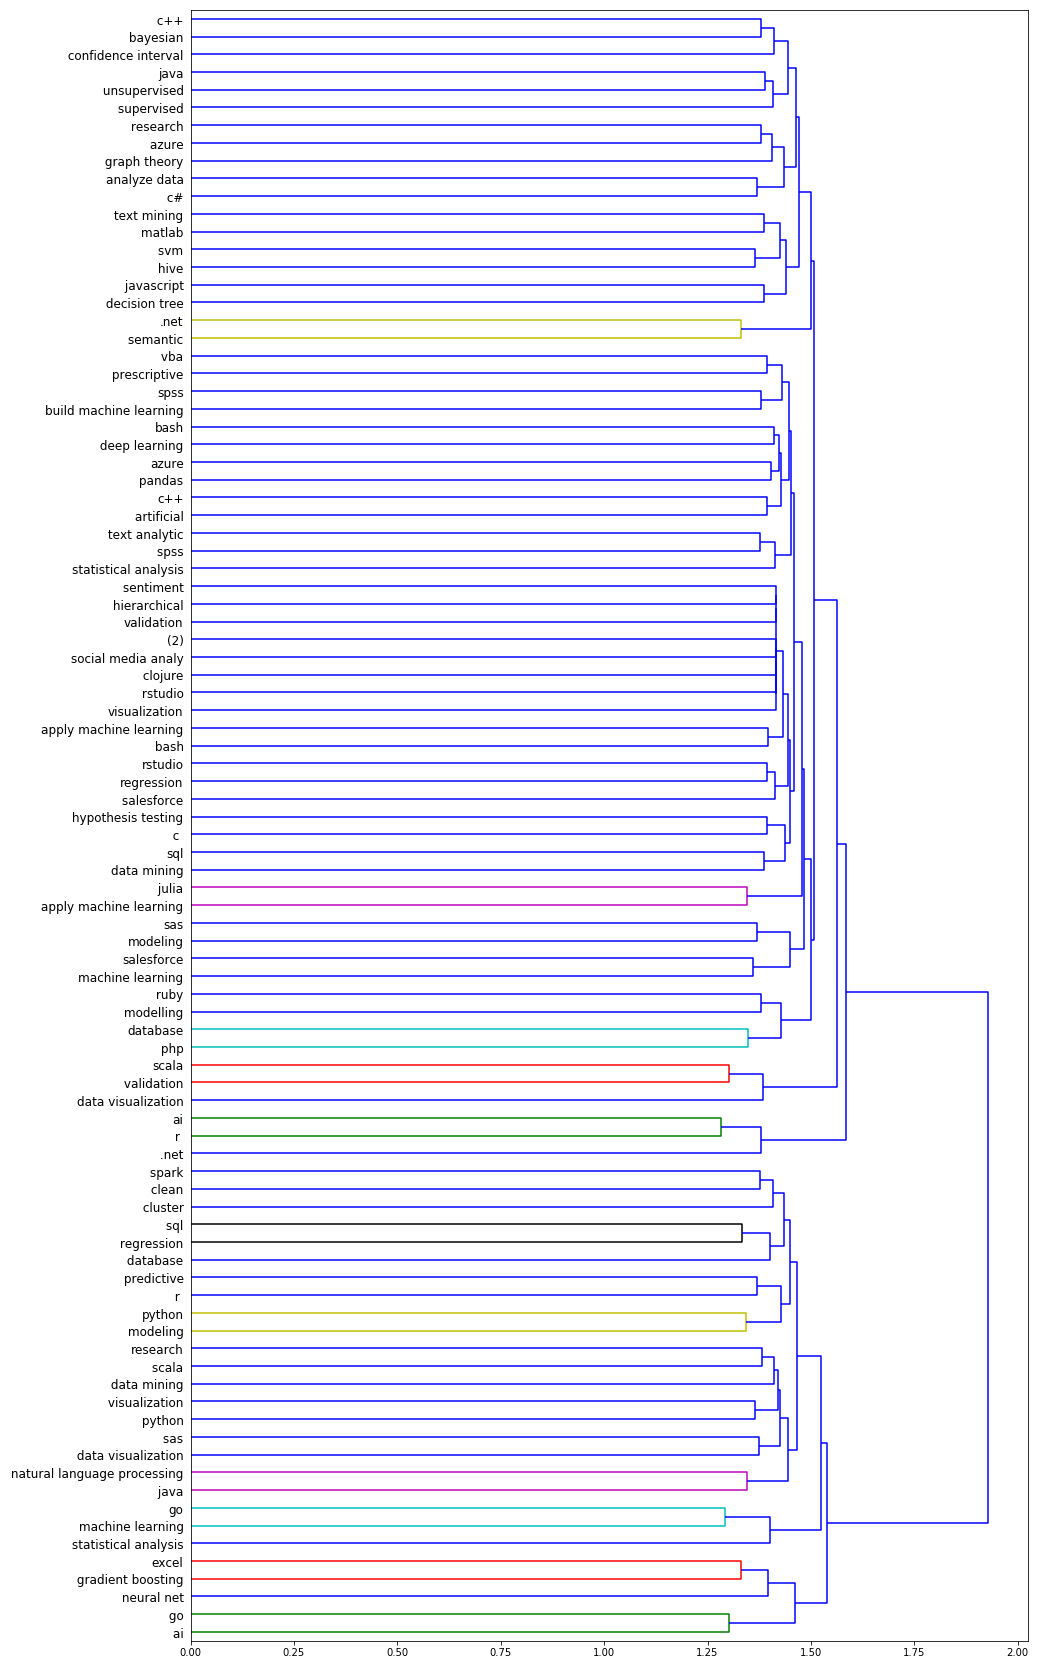

In [81]:
from scipy.cluster import hierarchy
label = []
label = series_df.index.tolist()
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 30))
dendrogram = sch.dendrogram(sch.linkage(dist,method = 'ward'), labels = label,orientation='right',p=15, truncate_mode='level', get_leaves=True, leaf_font_size=12)

In [82]:
series_df = indeed[['skills', 'language']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

#define vectorizer parameters
tfidf_vectorizer = CountVectorizer(
                                 )

tfidf_matrix = tfidf_vectorizer.fit_transform(series_df) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

(30371, 72)


In [84]:
terms = tfidf_vectorizer.get_feature_names()
terms

['ai',
 'analy',
 'analysis',
 'analytic',
 'analyze',
 'apply',
 'artificial',
 'azure',
 'bash',
 'bayesian',
 'boosting',
 'build',
 'clean',
 'clojure',
 'cluster',
 'confidence',
 'data',
 'database',
 'decision',
 'deep',
 'excel',
 'go',
 'gradient',
 'graph',
 'hierarchical',
 'hive',
 'hypothesis',
 'interval',
 'java',
 'javascript',
 'julia',
 'language',
 'learning',
 'machine',
 'matlab',
 'media',
 'mining',
 'modeling',
 'modelling',
 'natural',
 'net',
 'neural',
 'pandas',
 'php',
 'predictive',
 'prescriptive',
 'processing',
 'python',
 'regression',
 'research',
 'rstudio',
 'ruby',
 'salesforce',
 'sas',
 'scala',
 'semantic',
 'sentiment',
 'social',
 'spark',
 'spss',
 'sql',
 'statistical',
 'supervised',
 'svm',
 'testing',
 'text',
 'theory',
 'tree',
 'unsupervised',
 'validation',
 'vba',
 'visualization']

In [85]:
dist = 1 - cosine_similarity(tfidf_matrix.T)

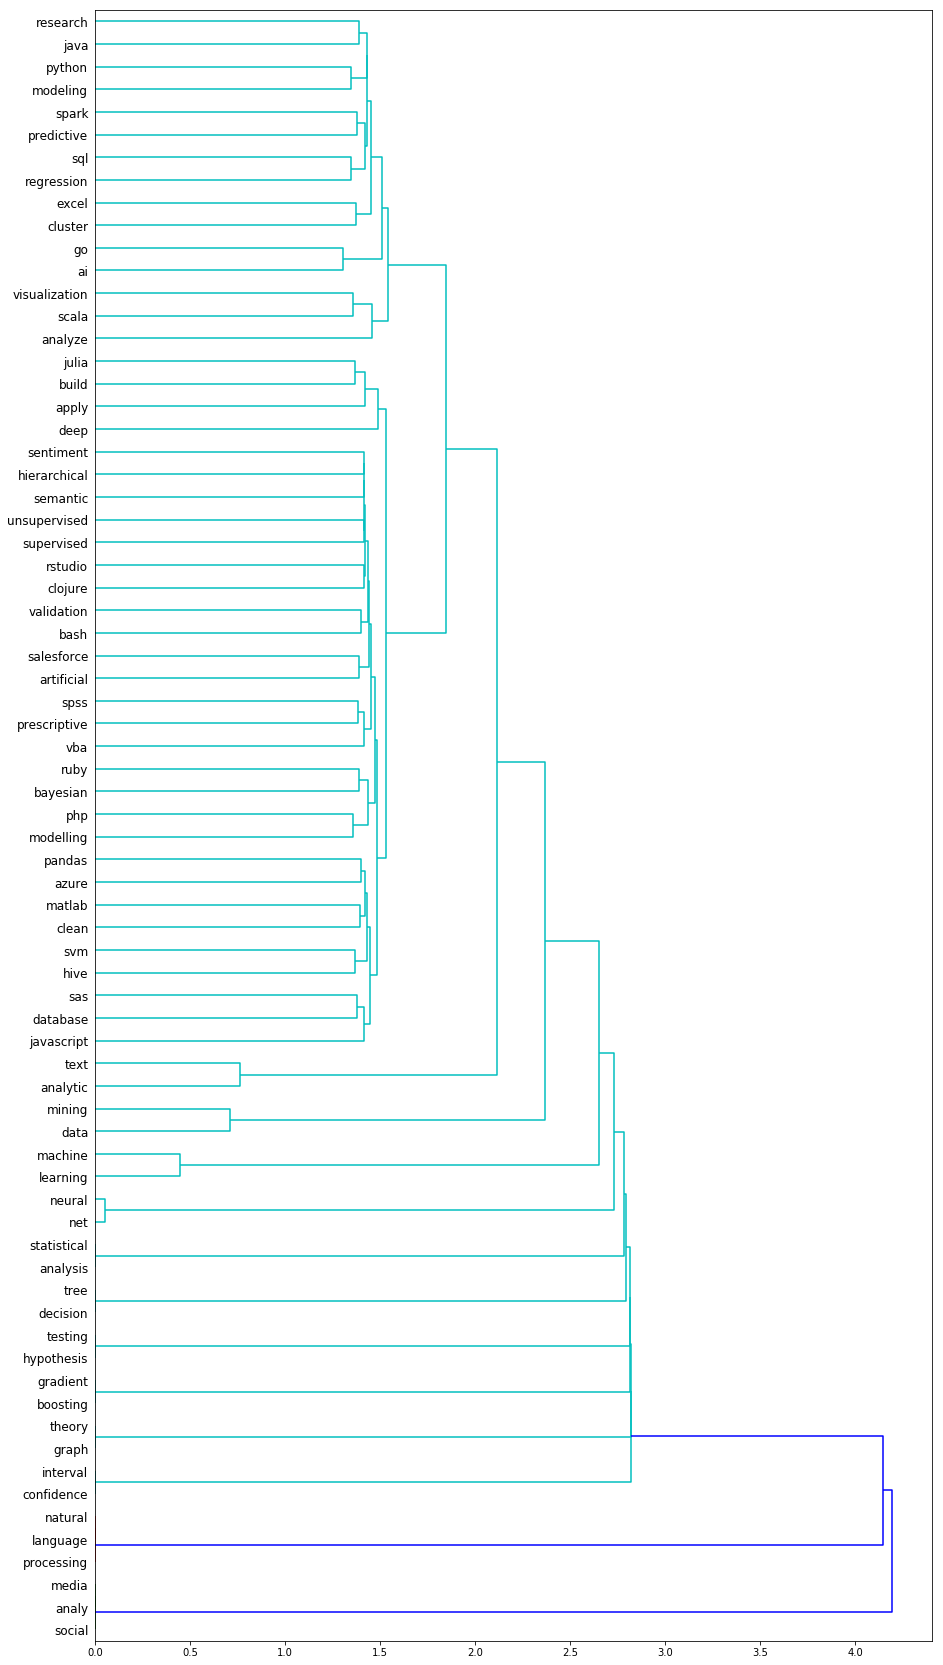

In [86]:
from scipy.cluster import hierarchy
label = []
label = terms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 30))
dendrogram = sch.dendrogram(sch.linkage(dist,method = 'ward'), labels = label,p=22, truncate_mode='level',orientation='right', get_leaves=True, leaf_font_size=12,distance_sort='descending')

values passed to leaf_label_func
leaves :  [57, 1, 35, 46, 31, 39, 15, 27, 23, 66, 10, 22, 26, 64, 18, 67, 2, 61, 40, 41, 32, 33, 16, 36, 3, 65, 29, 17, 53, 25, 63, 12, 34, 7, 42, 38, 43, 9, 51, 70, 45, 59, 6, 52, 8, 69, 13, 50, 62, 68, 55, 24, 56, 19, 5, 11, 30, 4, 54, 71, 0, 21, 14, 20, 48, 60, 44, 58, 37, 47, 28, 49]


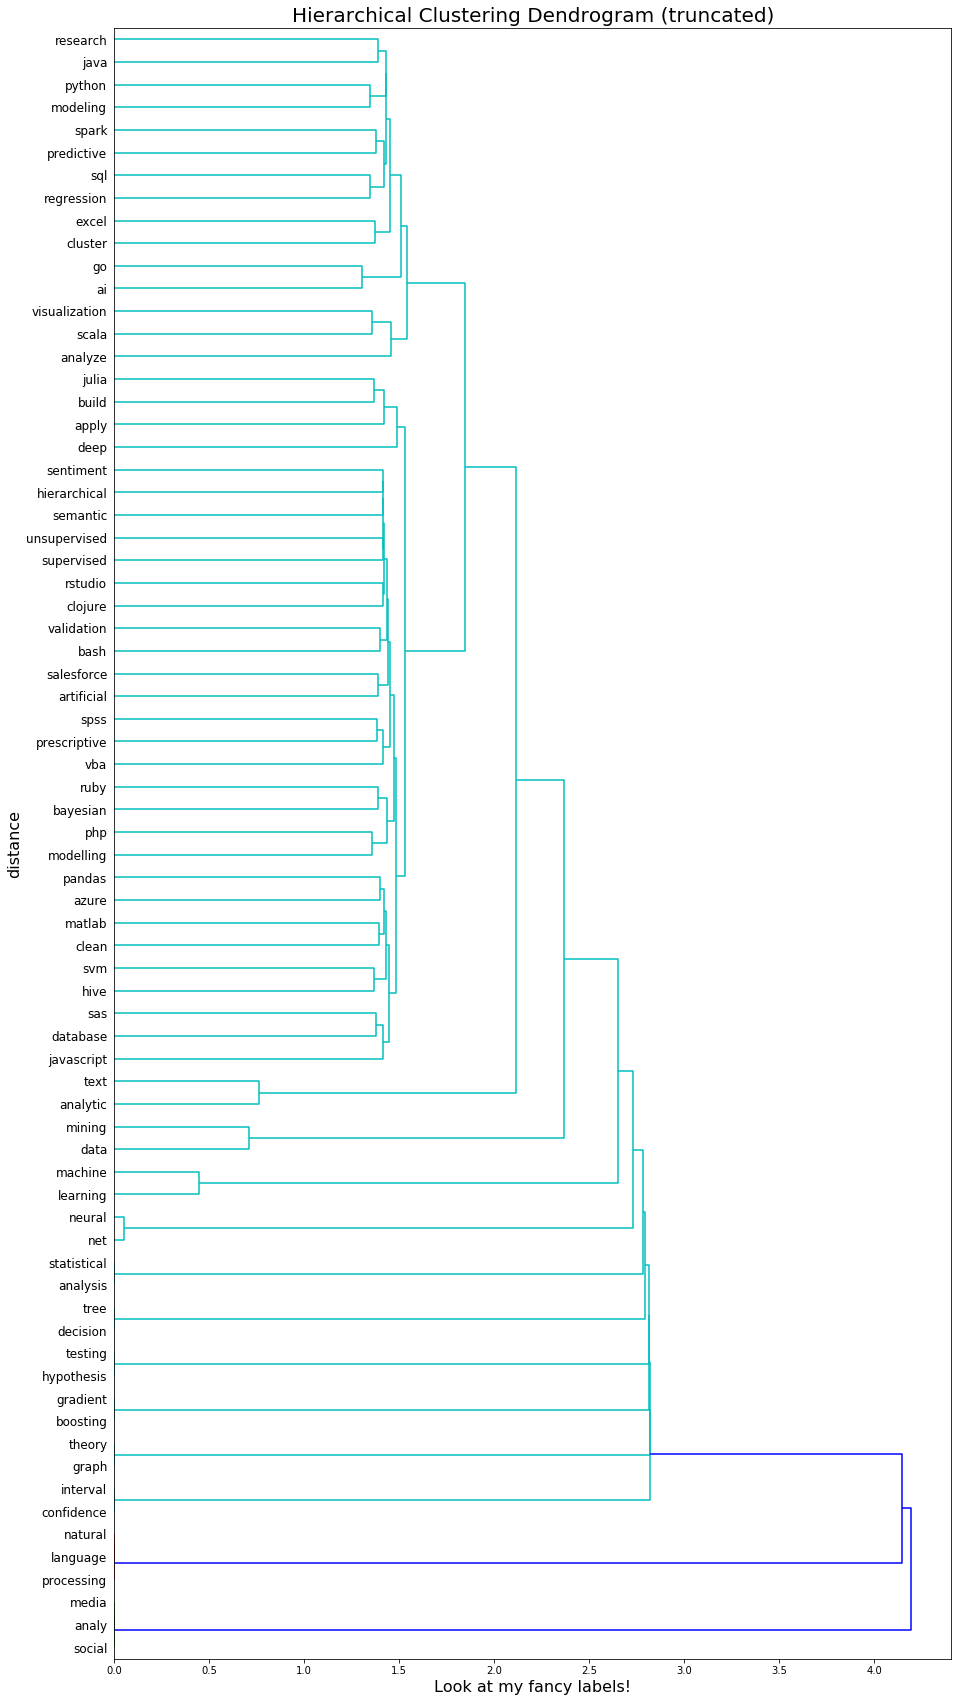

In [87]:
linked = sch.linkage(dist, 'ward')
labels=[]
labels = terms
p = len(labels)

plt.figure(figsize=(15, 30))
plt.title('Hierarchical Clustering Dendrogram (truncated)', fontsize=20)
plt.xlabel('Look at my fancy labels!', fontsize=16)
plt.ylabel('distance', fontsize=16)

# call dendrogram to get the returned dictionary 
# (plotting parameters can be ignored at this point)
# R = dendrogram(
#                 linked,
# #                 truncate_mode='lastp',  # show only the last p merged clusters
# #                 p=p,  # show only the last p merged clusters
# #                 no_plot=True,
#                 )
R = sch.dendrogram(sch.linkage(dist,method = 'ward'), labels = label, p=p, truncate_mode='lastp',orientation='right', leaf_font_size=12)

print("values passed to leaf_label_func\nleaves : ", R["leaves"])

# create a label dictionary
temp = {R["leaves"][ii]: labels[ii] for ii in range(len(R["leaves"]))}
def llf(xx):
    return "{} - custom label!".format(temp[xx])

## This version gives you your label AND the count
# temp = {R["leaves"][ii]:(labels[ii], R["ivl"][ii]) for ii in range(len(R["leaves"]))}
# def llf(xx):
#     return "{} - {}".format(*temp[xx])


# dendrogram(
#             linked,
# #             truncate_mode='lastp',  # show only the last p merged clusters
# #             p=p,  # show only the last p merged clusters
# #             leaf_label_func=llf,
# #             leaf_rotation=60.,
# #             leaf_font_size=12.,
# #             show_contracted=True,  # to get a distribution impression in truncated branches
#             )

plt.show()

Ward: Tends to look for spherical clusters, very cohesive inside and extremely differentiated from other groups. Another nice characteristic is that the method tends to find clusters of similar size. It works only with the Euclidean distance.

Complete: Links clusters using their furthest observations, that is, their most dissimilar data points. Consequently, clusters created using this method tend to be comprised of highly similar observations, making the resulting groups quite compact.

Average: Links clusters using their centroids and ignoring their boundaries. The method creates larger groups than the complete method. In addition, the clusters can be different sizes and shapes, contrary to the Ward’s solutions. Consequently, this average, multipurpose, approach sees successful use in the field of biological sciences.

There are also three distance metrics:

Euclidean (euclidean or l2): As seen in K-means

Manhattan (manhattan or l1): Similar to Euclidean, but the distance is calculated by summing the absolute value of the difference between the dimensions. In a map, if the Euclidean distance is the shortest route between two points, the Manhattan distance implies moving straight, first along one axis and then along the other — as a car in the city would, reaching a destination by driving along city blocks.

Cosine (cosine): A good choice when there are too many variables and you worry that some variable may not be significant. Cosine distance reduces noise by taking the shape of the variables, more than their values, into account. It tends to associate observations that have the same maximum and minimum variables, regardless of their effective value